In [14]:
from glob import glob
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
RESULTS = glob(os.path.join("set_rank_results_conv_cifar100", "*.json"))
results = pd.DataFrame([json.load(open(file)) for file in RESULTS])
results["best_val_categorical_accuracy"] = results["val_categorical_accuracy"].map(np.max)
results.head()

,initial_rank,new_rank,rank_update_epoch,total_epochs,loss,categorical_accuracy,val_loss,val_categorical_accuracy,pre_update_loss,pre_update_categorical_accuracy,pre_update_val_loss,pre_update_val_categorical_accuracy,post_update_loss,post_update_categorical_accuracy,post_update_val_loss,post_update_val_categorical_accuracy,best_val_categorical_accuracy
0,-1,50,1,50,"[4.211894989013672, 3.7534401416778564, 3.5121...","[0.0566600002348423, 0.12629999220371246, 0.16...","[3.9092013835906982, 3.631721019744873, 3.4621...","[0.1021999940276146, 0.1467999964952469, 0.178...",3.886894,0.10422,3.909202,0.1022,3.886894,0.10422,3.909202,0.1022,0.4323
1,-1,10,3,50,"[4.208507061004639, 3.774122476577759, 3.52627...","[0.05593999847769737, 0.1240599974989891, 0.16...","[3.936525583267212, 3.6506218910217285, 3.4352...","[0.09569999575614929, 0.1477999985218048, 0.18...",3.391030,0.18912,3.435238,0.1859,3.391030,0.18912,3.435238,0.1859,0.4253
2,-1,50,2,50,"[4.226785659790039, 3.791909694671631, 3.53389...","[0.05289999768137932, 0.11937999725341797, 0.1...","[3.951653003692627, 3.7066705226898193, 3.4429...","[0.08590000122785568, 0.1281999945640564, 0.18...",3.677031,0.13582,3.706670,0.1282,3.677031,0.13582,3.706670,0.1282,0.4266
3,-1,10,2,50,"[4.224714756011963, 3.7752363681793213, 3.5254...","[0.053439997136592865, 0.12135999649763107, 0....","[3.9386816024780273, 3.6827845573425293, 3.461...","[0.09510000050067902, 0.1354999989271164, 0.18...",3.647365,0.14458,3.682785,0.1355,3.647365,0.14458,3.682785,0.1355,0.4271
4,-1,160,3,50,"[4.2550835609436035, 3.849698066711426, 3.5598...","[0.04797999933362007, 0.10892000049352646, 0.1...","[4.051120281219482, 3.6908910274505615, 3.4709...","[0.0731000006198883, 0.1378999948501587, 0.173...",3.429373,0.18222,3.470925,0.1734,3.429373,0.18222,3.470925,0.1734,0.4287


In [19]:
results["new_rank"].unique(), results["rank_update_epoch"].unique()

(array([ 50,  10, 160]), array([1, 3, 2]))

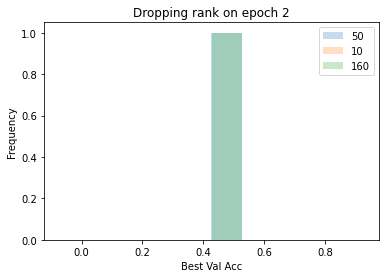

,new_rank,best_val_categorical_accuracy
new_rank,,
10,10.0,0.42625
50,50.0,0.42660
160,160.0,0.42750


In [23]:
update_epoch = 2
epoch_results = results.loc[
    results["rank_update_epoch"] == update_epoch,
    ["new_rank", "best_val_categorical_accuracy"]
]
for new_rank in epoch_results["new_rank"].unique():
    plt.hist(
        epoch_results.loc[epoch_results["new_rank"] == new_rank, ["best_val_categorical_accuracy"]],
        label=f"{new_rank}",
        # bins=10,
        alpha=0.25)
plt.title(f"Dropping rank on epoch {update_epoch}")
plt.xlabel("Best Val Acc")
plt.ylabel("Frequency")
plt.legend()
plt.show()
epoch_results.groupby("new_rank").apply(np.mean)